In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43923d8c4439d4a8f73fa7f8d3b927b8


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hovd
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | warwick
Processing Record 4 of Set 1 | kayerkan
Processing Record 5 of Set 1 | kieta
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | coquimbo
Processing Record 9 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | akdepe
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | los llanos de aridane
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | mount gambier
Proce

Processing Record 36 of Set 4 | paracuru
Processing Record 37 of Set 4 | dhali
Processing Record 38 of Set 4 | harper
Processing Record 39 of Set 4 | ereymentau
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | juneau
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | lazaro cardenas
Processing Record 50 of Set 4 | juifang
City not found. Skipping...
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | imbituba
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | kilindoni
Processing Record 7 of Set 5 | saint quentin
C

Processing Record 24 of Set 8 | omsukchan
Processing Record 25 of Set 8 | polunochnoye
Processing Record 26 of Set 8 | ipora
Processing Record 27 of Set 8 | butka
Processing Record 28 of Set 8 | bantry
Processing Record 29 of Set 8 | gazli
Processing Record 30 of Set 8 | arys
Processing Record 31 of Set 8 | dikson
Processing Record 32 of Set 8 | beipiao
Processing Record 33 of Set 8 | ibra
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | tomatlan
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | rach gia
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | eirunepe
Processing Record 44 of Set 8 | paita
Processing Record 45 of Set 8 | marcona
City not found. Skipping...
Processing Record 46 of Set 8 | korla
Processing Record 47 of Se

Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | longlac
City not found. Skipping...
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | okhotsk
Processing Record 22 of Set 12 | luancheng
Processing Record 23 of Set 12 | antofagasta
Processing Record 24 of Set 12 | valparaiso
Processing Record 25 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 26 of Set 12 | sinkat
City not found. Skipping...
Processing Record 27 of Set 12 | setermoen
Processing Record 28 of Set 12 | bria
Processing Record 29 of Set 12 | sao filipe
Processing Record 30 of Set 12 | biu
Processing Record 31 of Set 12 | sikonge
Processing Record 32 of Set 12 | bambanglipuro
Processing Record 33 of Set 12 | salym
Processing Record 34 of Set 12 | nyrob
Processing Record 35 of Set 12 | bayshore gardens
Processing Record 36 of Set 12 | mayahi
Processing Record 37 of Set 12 | khao wong
Processing Record 38 of Set 12 | garowe
Processing Record 39 of Set 12 | 

In [10]:
# tally all the data 

city_count = len(city_data)
print(city_count)

557


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.0056,91.6419,53.65,19,0,12.30,MN,2022-06-09 14:03:13
1,Ponta Do Sol,32.6667,-17.1000,75.83,72,6,1.57,PT,2022-06-09 14:03:15
2,Warwick,41.7001,-71.4162,70.54,90,75,14.97,US,2022-06-09 14:03:16
3,Kayerkan,69.3497,87.7602,50.52,49,53,4.94,RU,2022-06-09 14:03:17
4,Kieta,-6.2167,155.6333,78.15,84,65,1.86,PG,2022-06-09 14:03:18
5,Rikitea,-23.1203,-134.9692,72.52,58,37,13.65,PF,2022-06-09 14:03:19
6,Pacific Grove,36.6177,-121.9166,55.51,90,0,4.61,US,2022-06-09 14:03:20
7,Coquimbo,-29.9533,-71.3436,53.33,82,75,5.75,CL,2022-06-09 14:03:21
8,Petropavlovsk-Kamchatskiy,53.0452,158.6483,44.11,90,100,1.81,RU,2022-06-09 14:03:22
9,Atar,20.5169,-13.0499,110.17,7,3,11.36,MR,2022-06-09 14:03:24


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2022-06-09 14:03:13,48.0056,91.6419,53.65,19,0,12.30
1,Ponta Do Sol,PT,2022-06-09 14:03:15,32.6667,-17.1000,75.83,72,6,1.57
2,Warwick,US,2022-06-09 14:03:16,41.7001,-71.4162,70.54,90,75,14.97
3,Kayerkan,RU,2022-06-09 14:03:17,69.3497,87.7602,50.52,49,53,4.94
4,Kieta,PG,2022-06-09 14:03:18,-6.2167,155.6333,78.15,84,65,1.86
5,Rikitea,PF,2022-06-09 14:03:19,-23.1203,-134.9692,72.52,58,37,13.65
6,Pacific Grove,US,2022-06-09 14:03:20,36.6177,-121.9166,55.51,90,0,4.61
7,Coquimbo,CL,2022-06-09 14:03:21,-29.9533,-71.3436,53.33,82,75,5.75
8,Petropavlovsk-Kamchatskiy,RU,2022-06-09 14:03:22,53.0452,158.6483,44.11,90,100,1.81
9,Atar,MR,2022-06-09 14:03:24,20.5169,-13.0499,110.17,7,3,11.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/09/22'

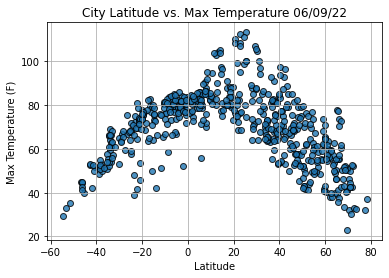

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

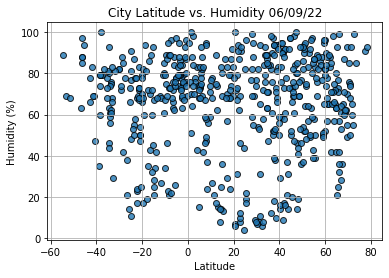

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

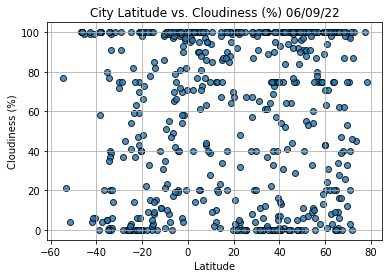

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()